<a href="https://colab.research.google.com/github/ramanask/ramanask/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
players = pd.read_csv("/content/players_22.csv")

In [6]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [7]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset=features)
data = players[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
5767,69,70,8000.0,1600000.0,26
5768,69,73,24000.0,2000000.0,25
5769,69,71,20000.0,1800000.0,25
5770,69,69,6000.0,1500000.0,26


In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data.describe()

,overall,potential,wage_eur,value_eur,age
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000
mean,2.972828,3.680102,1.668854,1.383146,5.076588
std,1.587331,1.850738,0.874296,0.654441,1.592477
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.833333,2.153846,1.214592,1.090276,4.076923
50%,2.666667,3.307692,1.414878,1.162497,5.230769
75%,3.916667,4.846154,1.786838,1.353366,6.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [9]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.230769,10.141631,5.015992,7.538462
1,10.583333,9.846154,8.711016,7.156822,6.769231
2,10.166667,9.461538,8.711016,3.313645,8.307692
3,10.166667,9.461538,8.711016,7.646892,5.615385
4,10.166667,9.461538,11.000000,7.466340,6.000000


In [10]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,1.833333,1.416667,3.500000,6.833333,1.833333
potential,6.000000,2.153846,2.153846,3.692308,2.538462
wage_eur,1.185980,1.443491,1.004292,2.072961,1.329041
value_eur,1.172814,1.843436,2.127160,1.327573,1.301780
age,5.230769,3.307692,4.461538,4.461538,6.000000


In [11]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)
labels = get_labels(data, centroids)
labels.value_counts()

4    2610
0    1024
3     858
1     739
2     504
dtype: int64

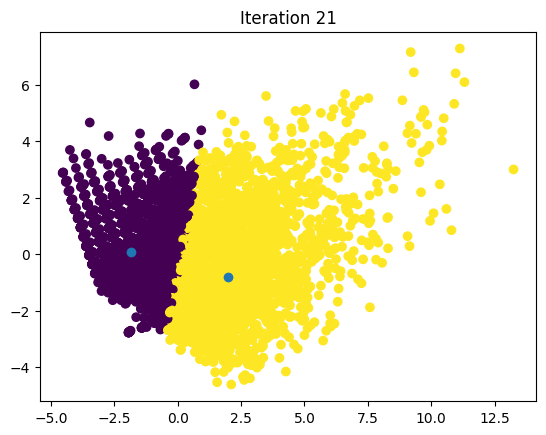

In [12]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [13]:
centroids

,0,1
overall,2.052390,3.622148
potential,2.219200,5.316905
wage_eur,1.334959,1.877281
value_eur,1.108213,1.625430
age,5.633947,3.873635


In [14]:
labels.value_counts()

0    3306
1    2429
dtype: int64

In [15]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
511,F. Ribéry,79,79,41000.0,6000000.0,38
663,Pepe Reina,78,78,27000.0,1600000.0,38
664,Negredo,78,78,27000.0,6000000.0,35
...,...,...,...,...,...,...
5767,K. Gorré,69,70,8000.0,1600000.0,26
5768,A. Fletcher,69,73,24000.0,2000000.0,25
5769,S. Gallagher,69,71,20000.0,1800000.0,25
5770,D. Holmes,69,69,6000.0,1500000.0,26


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [17]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,2.786754,2.265916,5.956349
potential,4.766585,2.311309,6.301740
wage_eur,1.553255,1.376837,2.985793
value_eur,1.325768,1.113455,2.491691
age,3.522044,5.984806,5.155220
